In [1]:
import optuna
import subprocess
import json
import shutil
import os
from train import main as train_main

def objective(trial):
    # パラメータの提案
    hidden_size = trial.suggest_categorical("hidden_size", [4, 3, 2, 1])
    gamma = trial.suggest_float("gamma", 0.90, 0.99)
    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    episodes = trial.suggest_int("episodes", 100, 300, step=20)  # 100, 110, 120, ...
    
    # モデルパスの定義
    model_path = f"save/model_trial_{trial.number}_h{hidden_size}_lr{lr:.5f}_g{gamma:.3f}.pth"

    # 訓練スタート
    train_main(
        lr=lr,
        gamma=gamma,
        hidden_size=hidden_size,
        episodes=episodes,
        save_path=model_path  # ←動的に渡す！
    )
    
    # パスを trial に記録
    trial.set_user_attr("model_path", model_path)
    
    # 訓練結果を保存
    result = subprocess.run(["python", "inference.py", model_path], capture_output=True, text=True)
    # デバッグ出力を追加！
    print("STDOUT:\n", result.stdout)
    print("STDERR:\n", result.stderr)

    distance = float(result.stdout.strip())
    return distance

[I 2025-04-19 17:04:32,744] A new study created in memory with name: no-name-9935fc07-21c1-4207-a325-eddb305e3ccd


  0%|          | 0/100 [00:00<?, ?it/s]

Episode: 0, Total Reward: -1201.1411536238222
tensor([[55.4064, 30.8067,  0.0000,  1.0000],
        [31.2545, 86.5796,  0.0000,  1.0000],
        [76.9688, 30.6070,  0.0000,  1.0000],
        [67.5774, 99.6243,  0.0000,  1.0000],
        [16.7908, 15.7206,  0.0000,  1.0000],
        [79.3350, 35.9998,  0.0000,  1.0000],
        [87.3134, 54.7349,  0.0000,  1.0000],
        [61.9234, 40.5180,  0.0000,  1.0000],
        [ 0.1804,  6.0056,  0.0000,  1.0000],
        [83.6896, 12.6977,  0.0000,  1.0000],
        [83.5049, 74.2825,  0.0000,  1.0000],
        [23.1900, 93.9111,  0.0000,  1.0000],
        [82.5086, 66.3404,  0.0000,  1.0000],
        [21.3170, 84.6506,  0.0000,  1.0000],
        [53.6859, 18.9159,  0.0000,  1.0000],
        [25.5141, 91.6038,  0.0000,  1.0000],
        [63.7605, 26.0471,  0.0000,  1.0000],
        [72.6618, 27.5895,  0.0000,  1.0000],
        [86.5299, 76.4639,  0.0000,  1.0000],
        [31.2095,  3.1010,  0.0000,  1.0000],
        [68.9398, 78.0183,  0.0000

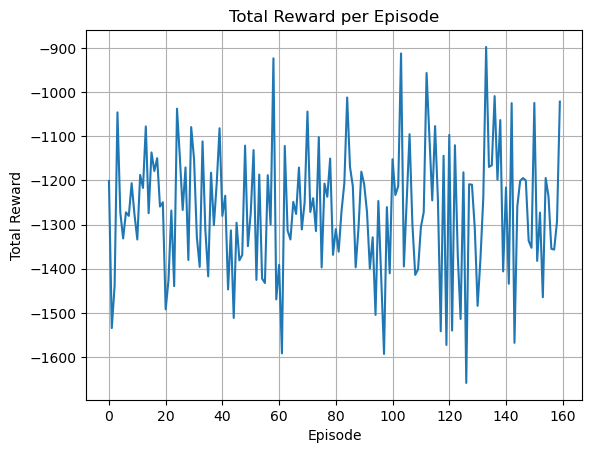

[W 2025-04-19 17:04:42,347] Trial 0 failed with parameters: {'hidden_size': 3, 'gamma': 0.9137733084749421, 'lr': 2.0167493207481758e-05, 'episodes': 160} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/iwashiro/.conda/envs/tsp/lib/python3.12/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_86565/2339438951.py", line 31, in objective
    result = subprocess.run(["python", "inference.py", model_path], capture_output=True, text=True)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/iwashiro/.conda/envs/tsp/lib/python3.12/subprocess.py", line 550, in run
    stdout, stderr = process.communicate(input, timeout=timeout)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/iwashiro/.conda/envs/tsp/lib/python3.12/subprocess.py", line 1209, in c

KeyboardInterrupt: 

In [2]:
# 最適化開始
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, show_progress_bar=True)
best_model_path = study.best_trial.user_attrs["model_path"]
# 結果表示
print("Best trial:")
print(study.best_trial)
print("Best model path:", best_model_path)

In [ ]:
from inference import main as inference_main

# best モデルでプロットしたい場合
inference_main(best_model_path, episodes=100, plot=True)

Episode: 0, Total Reward: -662.9947509765625
visit_orders:[3, 7, 6, 0, 2, 8, 1, 4, 5, 9]
Episode: 50, Total Reward: -521.5048828125
visit_orders:[5, 0, 9, 7, 6, 2, 1, 4, 8, 3]
Episode: 100, Total Reward: -477.7981262207031
visit_orders:[5, 1, 9, 4, 0, 6, 3, 2, 7, 8]
Episode: 150, Total Reward: -488.80426025390625
visit_orders:[6, 2, 4, 9, 0, 5, 8, 7, 3, 1]
Episode: 200, Total Reward: -566.7339477539062
visit_orders:[2, 9, 4, 3, 6, 7, 0, 5, 8, 1]
Episode: 250, Total Reward: -449.1602783203125
visit_orders:[0, 3, 2, 9, 6, 7, 8, 1, 5, 4]
Episode: 300, Total Reward: -574.8894653320312
visit_orders:[8, 5, 0, 9, 3, 7, 6, 4, 2, 1]
Episode: 350, Total Reward: -509.82452392578125
visit_orders:[6, 8, 3, 5, 2, 1, 4, 9, 7, 0]
Episode: 400, Total Reward: -583.8923950195312
visit_orders:[4, 8, 1, 3, 6, 2, 5, 0, 7, 9]
Episode: 450, Total Reward: -519.6714477539062
visit_orders:[0, 3, 2, 7, 9, 5, 6, 1, 4, 8]
Episode: 500, Total Reward: -469.2200622558594
visit_orders:[4, 5, 8, 6, 3, 0, 2, 1, 7, 9]
Epi

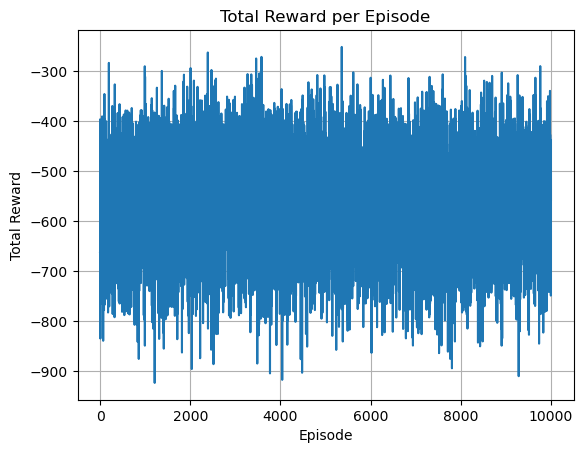

In [3]:
from train import main as train_main

# モデルパスの定義
model_test_path = f"save/model_test.pth"

# 訓練スタート
train_main(
    lr=0.001,
    gamma=0.95,
    episodes=10000,
    save_path=model_test_path  # ←動的に渡す！
)

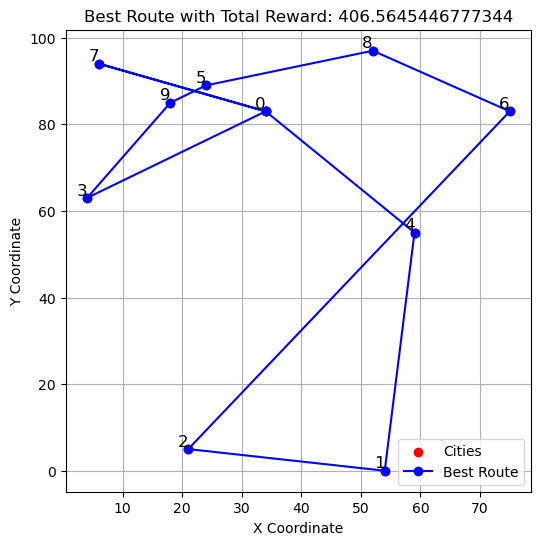

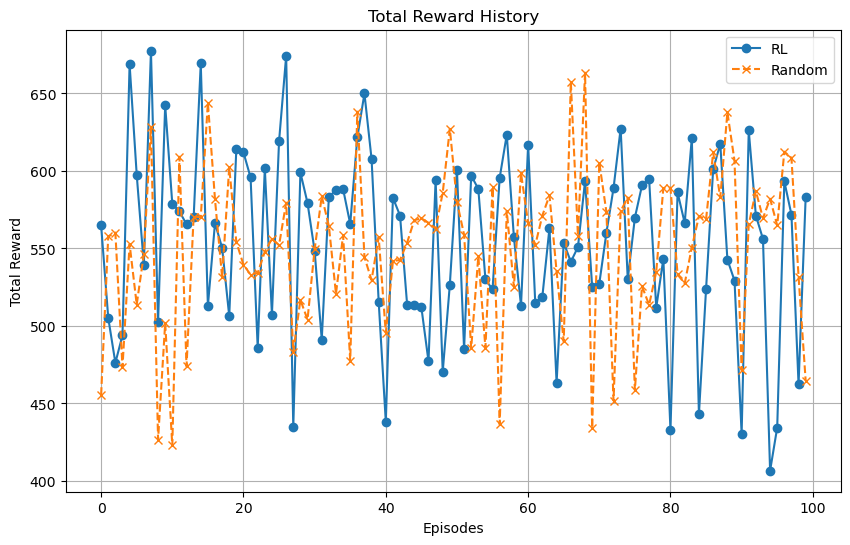

554.4161


In [4]:
from inference import main as inference_main

model_test_path = f"save/model_test.pth"

# best モデルでプロットしたい場合z
inference_main(model_test_path, episodes=100, plot=True)